In [26]:
import matplotlib.pyplot as plt

import pandas as pd

In [15]:
top5_import = pd.read_excel(f"Métriques discriminantes/Tableau métriques/Evolutions métriques/Par journée/2021_2022/Skill Corner/passes_top5.xlsx", index_col = 0)

In [3]:
bottom15 = pd.read_excel("Métriques discriminantes/Tableau métriques/Evolutions métriques/Par journée/2021_2022/Skill Corner/passes_bottom15.xlsx", index_col = 0)

In [16]:
top5_import.columns

Index(['count_opportunities_to_pass_to_runs_in_behind_per_match',
       'count_pass_attempts_to_runs_in_behind_per_match',
       'pass_opportunities_to_runs_in_behind_threat_per_match',
       'runs_in_behind_to_which_pass_attempted_threat_per_match',
       'pass_completion_ratio_to_runs_in_behind',
       'count_runs_in_behind_by_teammate_per_match',
       'runs_in_behind_to_which_pass_completed_threat_per_match',
       'count_completed_pass_to_runs_in_behind_per_match',
       'count_completed_pass_to_runs_in_behind_leading_to_shot_per_match',
       'count_completed_pass_to_runs_in_behind_leading_to_goal_per_match',
       ...
       'cross_receiver_runs_to_which_pass_attempted_threat_per_match',
       'pass_completion_ratio_to_cross_receiver_runs',
       'count_cross_receiver_runs_by_teammate_per_match',
       'cross_receiver_runs_to_which_pass_completed_threat_per_match',
       'count_completed_pass_to_cross_receiver_runs_per_match',
       'count_completed_pass_to_cross_

In [20]:
top5 = top5_import[top5_import.columns[0]]

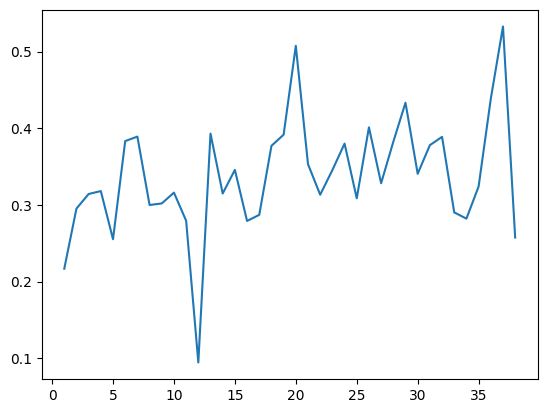

In [25]:
top5 = top5_import[top5_import.columns[3]]
fig = plt.figure()
plt.plot(top5)

In [9]:
fig.plot(top5_)

AttributeError: 'Figure' object has no attribute 'plot'